<a href="https://colab.research.google.com/github/Deepadarshni/ECommerce-Customer-Churn-Prediction/blob/main/E_Commerce_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import resample

In [ ]:
# Load dataset
data = pd.read_csv('churndataset.csv')
print(data.head())

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

In [ ]:
# Drop irrelevant columns (e.g., customer ID)
data.drop('CustomerID', axis=1, inplace=True)

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['PreferredLoginDevice'] = label_encoder.fit_transform(data['PreferredLoginDevice'])
data['PreferredPaymentMode'] = label_encoder.fit_transform(data['PreferredPaymentMode'])
data['PreferedOrderCat'] = label_encoder.fit_transform(data['PreferedOrderCat'])
data['MaritalStatus'] = label_encoder.fit_transform(data['MaritalStatus'])

In [ ]:
print(data.head())

   Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0                     1         3              6.0   
1      1     NaN                     2         1              8.0   
2      1     NaN                     2         1             30.0   
3      1     0.0                     2         3             15.0   
4      1     0.0                     2         1             12.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     4       0             3.0                         3   
1                     6       1             3.0                         4   
2                     4       1             2.0                         4   
3                     4       1             2.0                         4   
4                     0       1             NaN                         3   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress  \
0                 2                  2          

In [ ]:
# Handling missing values (fill with median)
data.fillna(data.median(), inplace=True)
print(data)

      Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0         1     4.0                     1         3              6.0   
1         1     9.0                     2         1              8.0   
2         1     9.0                     2         1             30.0   
3         1     0.0                     2         3             15.0   
4         1     0.0                     2         1             12.0   
...     ...     ...                   ...       ...              ...   
5625      0    10.0                     0         1             30.0   
5626      0    13.0                     1         1             13.0   
5627      0     1.0                     1         1             11.0   
5628      0    23.0                     0         3              9.0   
5629      0     8.0                     1         1             15.0   

      PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                        4       0             3.0     

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
                  'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
                  'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                  'DaySinceLastOrder', 'CashbackAmount']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

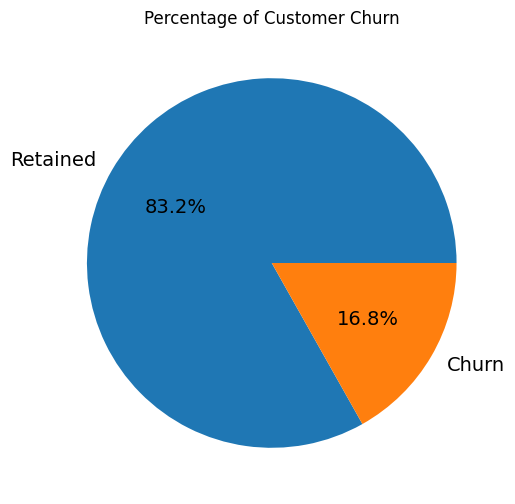

In [ ]:
# First, what is the percentage of customer churn
labels = ['Retained','Churn']
counts = data['Churn'].value_counts()
# print(counts)

plt.figure(figsize=(6,6))
plt.title('Percentage of Customer Churn')
plt.pie(counts, autopct='%1.1f%%', labels=labels, textprops={"fontsize":14})
plt.show()

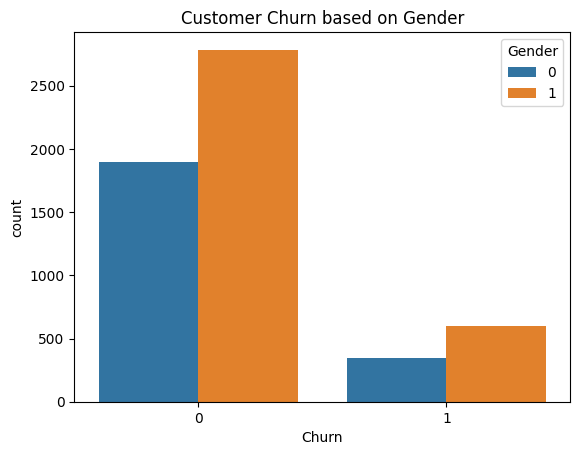

In [ ]:
# Which gender most like to churn?
sns.countplot(x=data['Churn'], hue=data['Gender'])
plt.title('Customer Churn based on Gender')
plt.show()

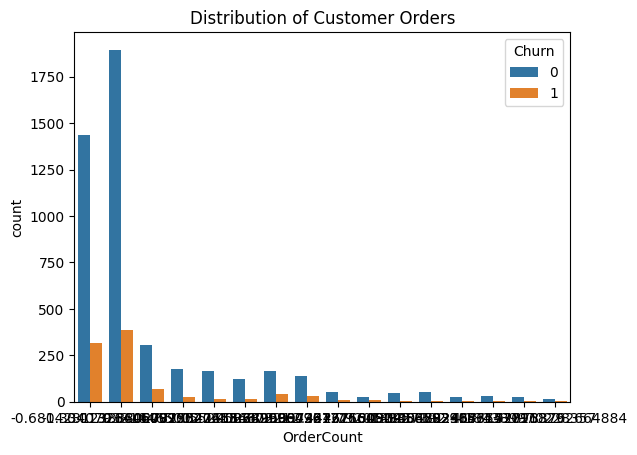

In [ ]:
sns.countplot(x=data['OrderCount'], hue=data['Churn'])
plt.title("Distribution of Customer Orders")
plt.show()

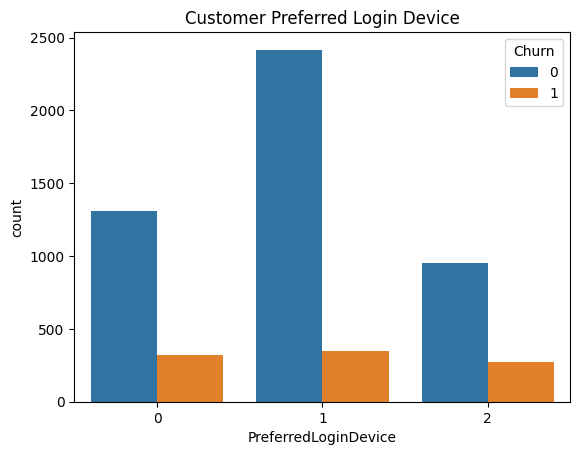

In [ ]:
sns.countplot(x=data['PreferredLoginDevice'], hue=data['Churn'])
plt.title('Customer Preferred Login Device')
plt.show()

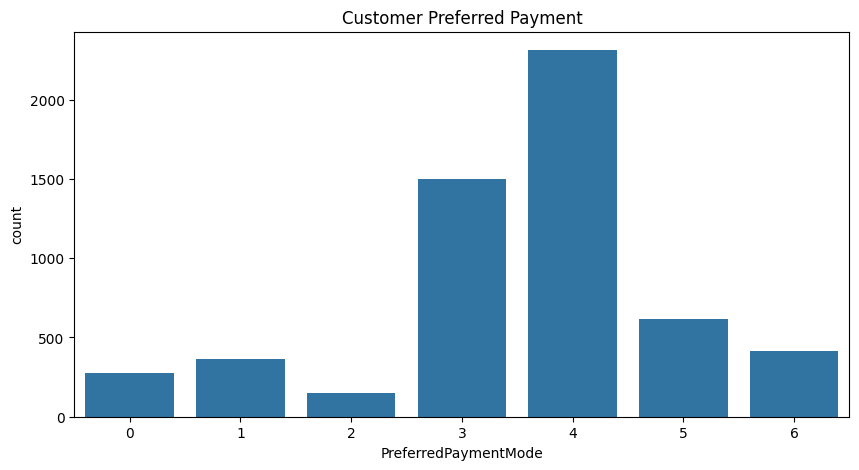

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['PreferredPaymentMode'])
plt.title('Customer Preferred Payment')
plt.show()

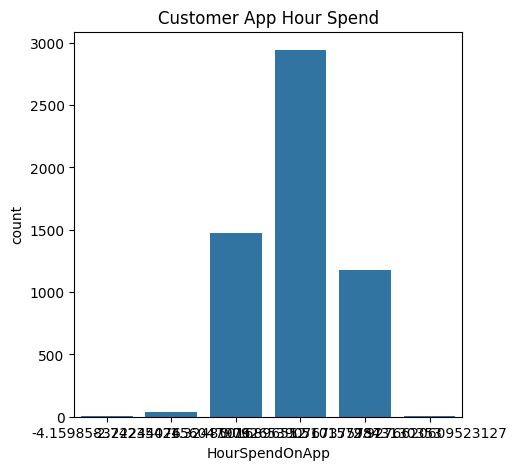

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['HourSpendOnApp'])
plt.title('Customer App Hour Spend')
plt.show()


Average Satisfaction Score: -1.135858725016146e-16


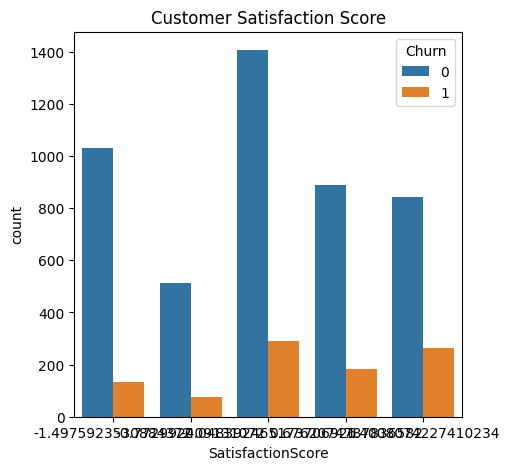

In [ ]:
average_score = data['SatisfactionScore'].mean()
print('Average Satisfaction Score:',average_score)

plt.figure(figsize=(5,5))
sns.countplot(x=data['SatisfactionScore'], hue=data['Churn'])
plt.title('Customer Satisfaction Score')
plt.show()

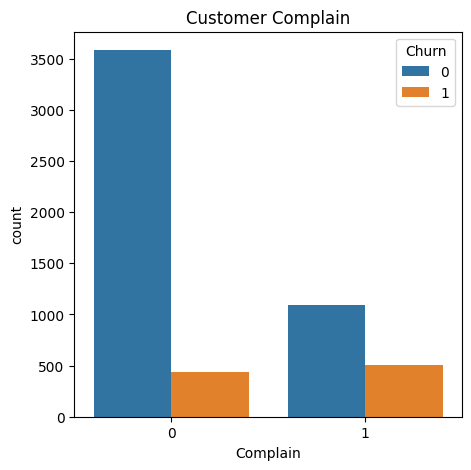

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Complain'], hue=data['Churn'])
plt.title('Customer Complain')
plt.show()

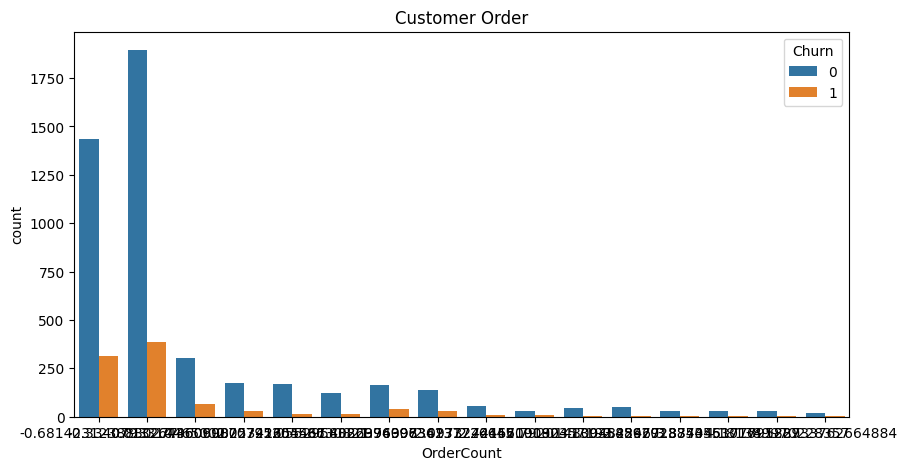

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['OrderCount'], hue=data['Churn'])
plt.title('Customer Order')
plt.show()

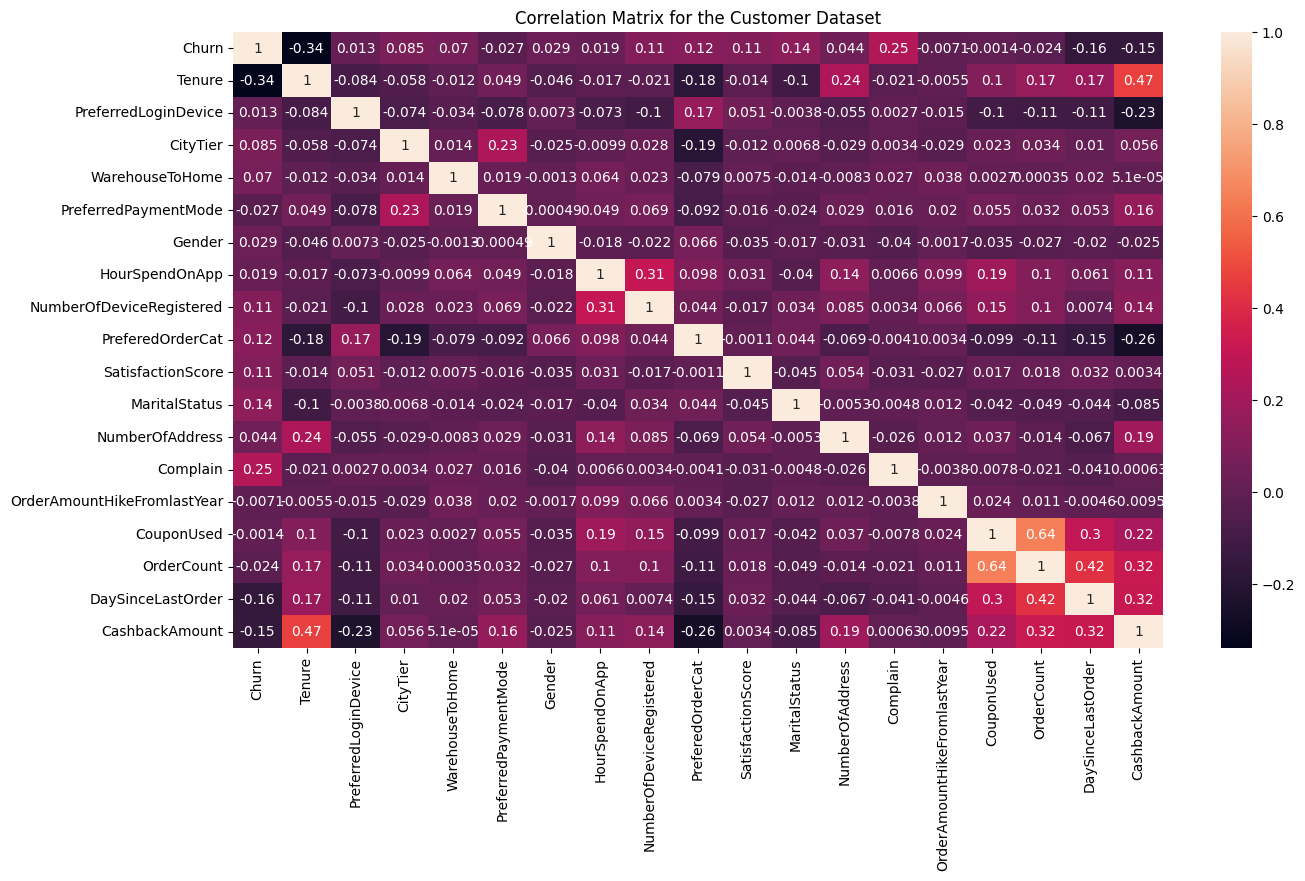

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix for the Customer Dataset")
plt.show()

In [ ]:
# Split data into features (X) and target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

In [ ]:
# Balance the dataset using resample
data_majority = data[data['Churn'] == 0]
data_minority = data[data['Churn'] == 1]

# Upsample minority class
data_minority_upsampled = resample(data_minority,
                                   replace=True,     # sample with replacement
                                   n_samples=len(data_majority),    # to match majority class
                                   random_state=42)   # reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
print(data_upsampled)

# Extract features and target variable from upsampled data
X_upsampled = data_upsampled.drop('Churn', axis=1)
y_upsampled = data_upsampled['Churn']

In [ ]:
n_components = 9            # Set number of components to 10
pca = PCA(n_components=n_components)

X_pca = pca.fit_transform(X_upsampled)
print(X_pca)

[[ 2.07549744 -0.84837895 -2.1392879  ... -0.79106516 -0.75092713
  -1.45046358]
 [ 0.54355772 -1.41560364 -1.34226804 ...  0.30525221 -1.5917575
   0.38068833]
 [ 0.8319536   0.61106671 -0.58319892 ... -0.57152268 -0.62523286
   0.02511463]
 ...
 [-1.79982234 -1.10021776  0.95037694 ... -1.34309396 -0.02544253
  -1.57179298]
 [ 1.63568155 -1.55519863 -0.05813233 ...  0.86478951  2.27442403
   0.58442157]
 [-1.48035069 -1.06812513 -0.54358584 ...  1.15722356  0.85645805
  -1.11823393]]


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_upsampled, test_size=0.3, random_state=42)

In [ ]:
# Build the ANN model
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=n_components))  # Input dimension after PCA
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

In [ ]:
# Compile the ANN model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the ANN model
ann.fit(X_train, y_train, batch_size=32, epochs=80, verbose=1)

Epoch 1/80
205/205 [==============================] - 1s 2ms/step - loss: 0.5533 - accuracy: 0.7254
Epoch 2/80
205/205 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.7629
Epoch 3/80
205/205 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.7740
Epoch 4/80
205/205 [==============================] - 29s 141ms/step - loss: 0.4489 - accuracy: 0.7951
Epoch 5/80
205/205 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.8052
Epoch 6/80
205/205 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8157
Epoch 7/80
205/205 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8277
Epoch 8/80
205/205 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8346
Epoch 9/80
205/205 [==============================] - 0s 2ms/step - loss: 0.3557 - accuracy: 0.8456
Epoch 10/80
205/205 [==============================] - 1s 3ms/step - loss: 0.3399 - accuracy: 0.8

In [ ]:

# Make predictions on the test set
y_pred = (ann.predict(X_test) > 0.5).astype(int)


88/88 [==============================] - 0s 1ms/step


In [ ]:
# Evaluate the model
accuracy = np.mean(y_pred == y_test.values.reshape(-1, 1))
print("Accuracy:", accuracy)


Accuracy: 0.9715302491103203


In [ ]:
print("Test Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Test Accuracy: 0.9715302491103203
Confusion Matrix:
 [[1339   75]
 [ 127  148]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(y_test, y_pred_binary)

# Calculate recall
recall = recall_score(y_test, y_pred_binary)

# Calculate F1-score
f1score = f1_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1score)


In [ ]:
# Predict churn for new customer data
new_customer_data = {
    'Tenure': 5,
    'Gender': 'Male',
    'PreferredLoginDevice': 'Mobile Phone',
    'CityTier': 3,
    'WarehouseToHome': 8,
    'PreferredPaymentMode': 'Credit Card',
    'HourSpendOnApp': 3,
    'NumberOfDeviceRegistered': 1,
    'SatisfactionScore': 4,
    'NumberOfAddress': 1,
    'MaritalStatus': 'Single',
    'PreferedOrderCat': 'Mobile',
    'Complain': 0,
    'OrderAmountHikeFromlastYear': 10,
    'CouponUsed': 2,
    'OrderCount': 5,
    'DaySinceLastOrder': 2,
    'CashbackAmount': 20
}

In [ ]:
# Create a DataFrame from the new customer data
new_customer_df = pd.DataFrame([new_customer_data])

In [ ]:
# Encode categorical variables and handle missing values
new_customer_df['Gender'] = label_encoder.fit_transform(new_customer_df['Gender'])
new_customer_df['PreferredLoginDevice'] = label_encoder.fit_transform(new_customer_df['PreferredLoginDevice'])
new_customer_df['PreferredPaymentMode'] = label_encoder.fit_transform(new_customer_df['PreferredPaymentMode'])
new_customer_df['MaritalStatus'] = label_encoder.fit_transform(new_customer_df['MaritalStatus'])
new_customer_df['PreferedOrderCat'] = label_encoder.fit_transform(new_customer_df['PreferedOrderCat'])
new_customer_df.fillna(data.median(), inplace=True)
new_customer_df[numerical_cols] = scaler.transform(new_customer_df[numerical_cols])


In [ ]:
# Apply PCA transformation to new customer data
new_customer_pca = pca.transform(new_customer_df)

In [ ]:
# Make churn prediction for the new customer


new_customer_prediction = (ann.predict(new_customer_pca) > 0.5).astype(int)
print(new_customer_prediction)

1/1 [==============================] - 0s 24ms/step
[[0]]


In [ ]:
if new_customer_prediction[0]== 1:
    print("Will churn.")
else:
    print("Will not Churn.")

Will not Churn.
